###Data Exploration

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import os
import pandas as pd
import numpy as np
from typing import Union, List, Literal, Dict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/turkiye-student-evaluation_generic[1].csv')


In [8]:
data.head(3)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


Additional Information

   instr: Instructor's identifier; values taken from {1,2,3}

   class: Course code (descriptor); values taken from {1-13}

   repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}

   attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}

   difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}

   Q1:  The semester course content, teaching method and evaluation system were provided at the start.

   Q2:  The course aims and objectives were clearly stated at the beginning of the period.

   Q3:  The course was worth the amount of credit assigned to it.

   Q4:  The course was taught according to the syllabus announced on the first day of class.

   Q5:	The class discussions, homework assignments, applications and studies were satisfactory.

   Q6:  The textbook and other courses resources were sufficient and up to date.

   Q7:  The course allowed field work, applications, laboratory, discussion and other studies.

   Q8:  The quizzes, assignments, projects and exams contributed to helping the learning.

   Q9:  I greatly enjoyed the class and was eager to actively participate during the lectures.

   Q10: My initial expectations about the course were met at the end of the period or year.

   Q11: The course was relevant and beneficial to my professional development.

   Q12: The course helped me look at life and the world with a new perspective.

   Q13: The Instructor's knowledge was relevant and up to date.

   Q14: The Instructor came prepared for classes.

   Q15: The Instructor taught in accordance with the announced lesson plan.

   Q16: The Instructor was committed to the course and was understandable.

   Q17: The Instructor arrived on time for classes.

   Q18: The Instructor has a smooth and easy to follow delivery/speech.

   Q19: The Instructor made effective use of class hours.

   Q20: The Instructor explained the course and was eager to be helpful to students.

   Q21: The Instructor demonstrated a positive approach to students.

   Q22: The Instructor was open and respectful of the views of students about the course.

   Q23: The Instructor encouraged participation in the course.

   Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.

   Q25: The Instructor responded to questions about the course inside and outside of the course.

   Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.

   Q27: The Instructor provided solutions to exams and discussed them with students.

   Q28: The Instructor treated all students in a right and objective manner.

   

   Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

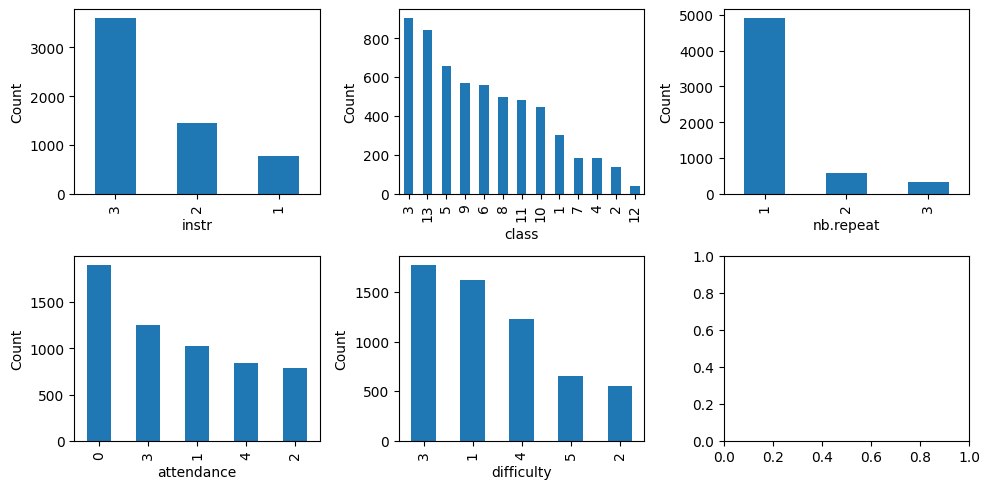

In [9]:
cat_cols = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']
fig, axs = plt.subplots(len(cat_cols)//3+1, 3, figsize=(10, 5))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    data[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


Some Insights

Count Values for most features  are not distributed equally

Are there only 3 instructors? or do the three instructors resemble a cluster with similar teaching styles or habits? Instructor 3 seems to have the majority, Why is that? How many classes does an instructor take?

The count values of the class feature, are not distributed equally, it is rather imbalanced, the majority seems to be 3, 13, and 5 while the minority seems to be 4, 2, 12, why do we have less data for those classes? are they less attended than the first 3?

Classes are not repeated so often, majority of times a class is retaken is only 1, but there are cases where a class is repeated more than once, why is that the case?

0 then 3? 1 then 4? that's a weird pattern in attendance, what is influencing that? The course or the Instructor?

If instructor/classes are not too difficult, since the top values are 3 and 1, why is attendance level low?

In [10]:
data.groupby(['instr','class'])[['instr']].count().rename(columns={'instr':'instr_count'})

instr_count
instr class             
1     2              140
      7              187
      10             448
2     1              303
      6              558
      11             484
      13              99
3     3              904
      4              187
      5              656
      8              500
      9              571
      12              41
      13             742

Different Instructors take Different Classes, Instructor 2 and 3 both take class 13, but Instructor 3 teaches majority of the students, Why?

Instructor 3 takes the largest set of courses, Instructor 3 can't be one person then?

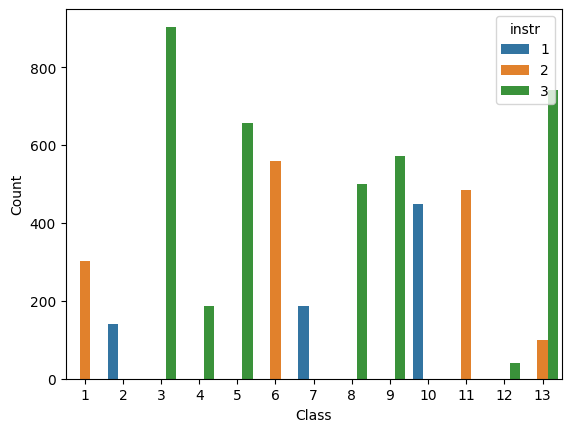

In [11]:
grouped_data = data.groupby(['instr', 'class'])[['instr']].count().rename(columns={'instr': 'instr_count'}).reset_index()
sns.barplot(data=grouped_data, x='class', y='instr_count', hue='instr')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Instructors 2 and 3 have a higher difficulty count, this can also be noticed from the courses they take, as the seem to take courses where students indicate a higher difficulty level. A majority of Instructor 3 courses are only given a difficulty of 1, does that indicate the more courses an Instructor takes the easier? and the less courses an Instructor takes the harder?

In [12]:
grouped_data = data.groupby(['class', 'difficulty'])[['difficulty']].count().rename(columns={'difficulty': 'difficulty_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'difficulty_count'))
top_observation_per_group

,,,difficulty_count
class,class,difficulty,
1,1,3,0.419142
2,2,3,0.350000
3,3,1,0.369469
4,4,1,0.368984
5,5,1,0.306402
6,6,3,0.431900
7,7,4,0.449198
8,8,3,0.330000
9,9,1,0.309982


58% students of class 12 indicate it has a difficulty level of 3

45% students of class 10 indicate it has a difficulty level of 3

45% students of class 7 indicate it has a difficulty level of 4


The students don't seem to be so united in giving a difficulty level, the lowest percentile is 30% and the highest is 58%, why is that? Why are others choosing different levels of difficulty, what influences their decision?

In [13]:
grouped_data = data.groupby(['instr', 'difficulty'])[['difficulty']].count().rename(columns={'difficulty': 'difficulty_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'difficulty_count'))
top_observation_per_group

,,,difficulty_count
instr,instr,difficulty,
1,1,3,0.370323
2,2,3,0.400970
3,3,1,0.319356


In [14]:
grouped_data = data.groupby(['class', 'attendance'])[['attendance']].count().rename(columns={'attendance': 'attendance_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'attendance_count'))
top_observation_per_group

,,,attendance_count
class,class,attendance,
1,1,0,0.303630
2,2,3,0.335714
3,3,0,0.393805
4,4,0,0.422460
5,5,0,0.318598
6,6,0,0.258065
7,7,3,0.256684
8,8,0,0.292000
9,9,0,0.402802


The classes with the Highest record of Difficulty also has the highest record of attendance

58% students of class 12 indicate it has a difficulty level of 3

45% students of class 10 indicate it has a difficulty level of 3

45% students of class 7 indicate it has a difficulty level of 4

While also

44% students of class 12 have an attendance level of 1

27% students of class 10 have an attendance level of 3

26% students of class 7 have an attendance level of 3

It seems Classes taken by Instructor 1 have the highest attendance, as i can be seen in classes 2, 7, 10, where the majority of students have a class attendance of 3

 Why are others choosing different levels of attendance also, what influences their decision?

In [15]:
grouped_data = data.groupby(['instr', 'attendance'])[['attendance']].count().rename(columns={'attendance': 'attendance_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'attendance_count'))
top_observation_per_group

,,,attendance_count
instr,instr,attendance,
1,1,3,0.280000
2,2,0,0.274238
3,3,0,0.372119


What's the Correlation between attendance and difficulty

In [16]:
grouped_data = data.groupby(['attendance','difficulty'])[['difficulty']].count().rename(columns={'difficulty': 'difficulty_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'difficulty_count'))
top_observation_per_group

,,,difficulty_count
attendance,attendance,difficulty,
0,0,1,0.692429
1,1,3,0.369650
2,2,3,0.434343
3,3,3,0.399361
4,4,3,0.388889


69% of students who hardly attend classes, indicate that the course is most likely easy, but as the attendance increases, a majority of students indicate the course to be more difficult

In [17]:
grouped_data = data.groupby(['difficulty','attendance'])[['attendance']].count().rename(columns={'attendance': 'attendance_count'})
total_difficulty_count = grouped_data.groupby(level=0).transform('sum')
normalized_data = grouped_data / total_difficulty_count
top_observation_per_group = normalized_data.groupby(level=0).apply(lambda x: x.nlargest(1, 'attendance_count'))
top_observation_per_group

,,,attendance_count
difficulty,difficulty,attendance,
1,1,0,0.812963
2,2,1,0.329690
3,3,3,0.281849
4,4,3,0.322449
5,5,3,0.239264


81% of students who indicate a course is most likely easy, have 0 attendance, but as the difficulty, majority of students attending the class also increases

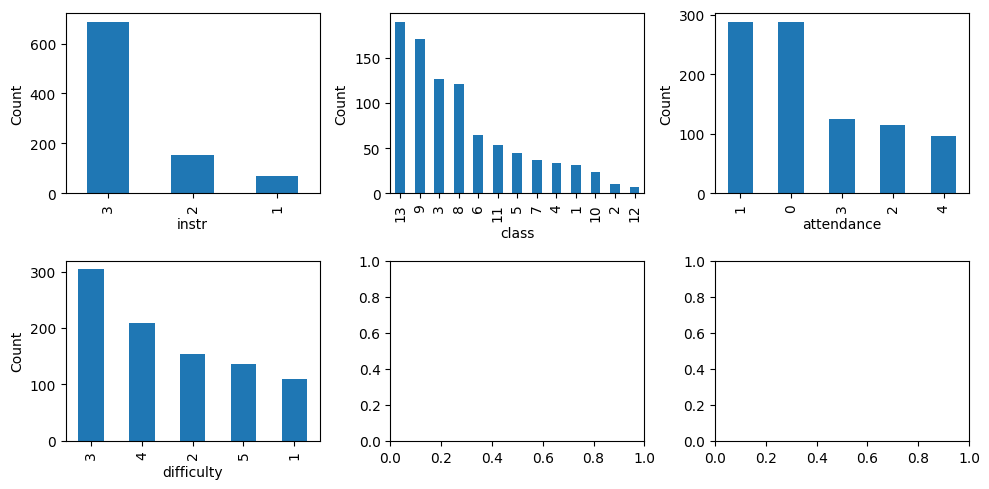

In [18]:
xyl = data[data['nb.repeat']!=1]
cat_cols = ['instr', 'class', 'attendance', 'difficulty']
fig, axs = plt.subplots(len(cat_cols)//3+1, 3, figsize=(10, 5))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    xyl[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


Interesting Insight, Those who seem to be re-taking the course one more than once, are

Those who indicate 1 or 0 attendance, with courses with 3-4 level of difficulty

#Questionnaire Survey

##Q1,Q5-Q10 Personal Commitment

Q13-Q28  #Instructor questions

Q2-Q4,Q11,Q12  #Course questions

Q1,Q5-Q10  #Personal Commitment

In [19]:
data.groupby(['class'])[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']].mean()

,Q1,Q5,Q6,Q7,Q8,Q9,Q10
class,,,,,,,
1,3.171617,3.356436,3.316832,3.339934,3.257426,3.445545,3.382838
2,3.421429,3.607143,3.542857,3.557143,3.600000,3.564286,3.564286
3,2.828540,2.936947,2.940265,2.926991,2.908186,2.942478,2.910398
4,2.433155,2.743316,2.780749,2.737968,2.711230,3.090909,2.786096
5,3.030488,3.181402,3.221037,3.092988,3.048780,3.120427,3.094512
6,3.098566,3.324373,3.331541,3.308244,3.220430,3.333333,3.340502
7,2.727273,3.106952,2.812834,2.914439,3.219251,3.000000,2.930481
8,2.692000,3.006000,3.170000,3.010000,2.942000,3.264000,3.066000
9,2.849387,3.047285,3.164623,3.071804,2.989492,3.157618,3.054291


Q1:  The semester course content, teaching method and evaluation system were provided at the start.

Q5:	The class discussions, homework assignments, applications and studies were satisfactory.

Q6:  The textbook and other courses resources were sufficient and up to date.

Q7:  The course allowed field work, applications, laboratory, discussion and other studies.

Q8:  The quizzes, assignments, projects and exams contributed to helping the learning.

Q9:  I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

As you can see from the plot below, Majority of the recorded scores of are between 3 and 4, but there are some few exceptions in class 13, 12, 3 and 4, where Majority of the recorded scores are between 1, 3 and 4

Why are this classes different? why is 1 a majority for such classes?

Classes 5, 8, 9 also have a slight deviation from the normal Majority of 3 and 4, this are classes taught by Instructor 3, where most of the courses are quite easy though with poor attendance, Why is this?

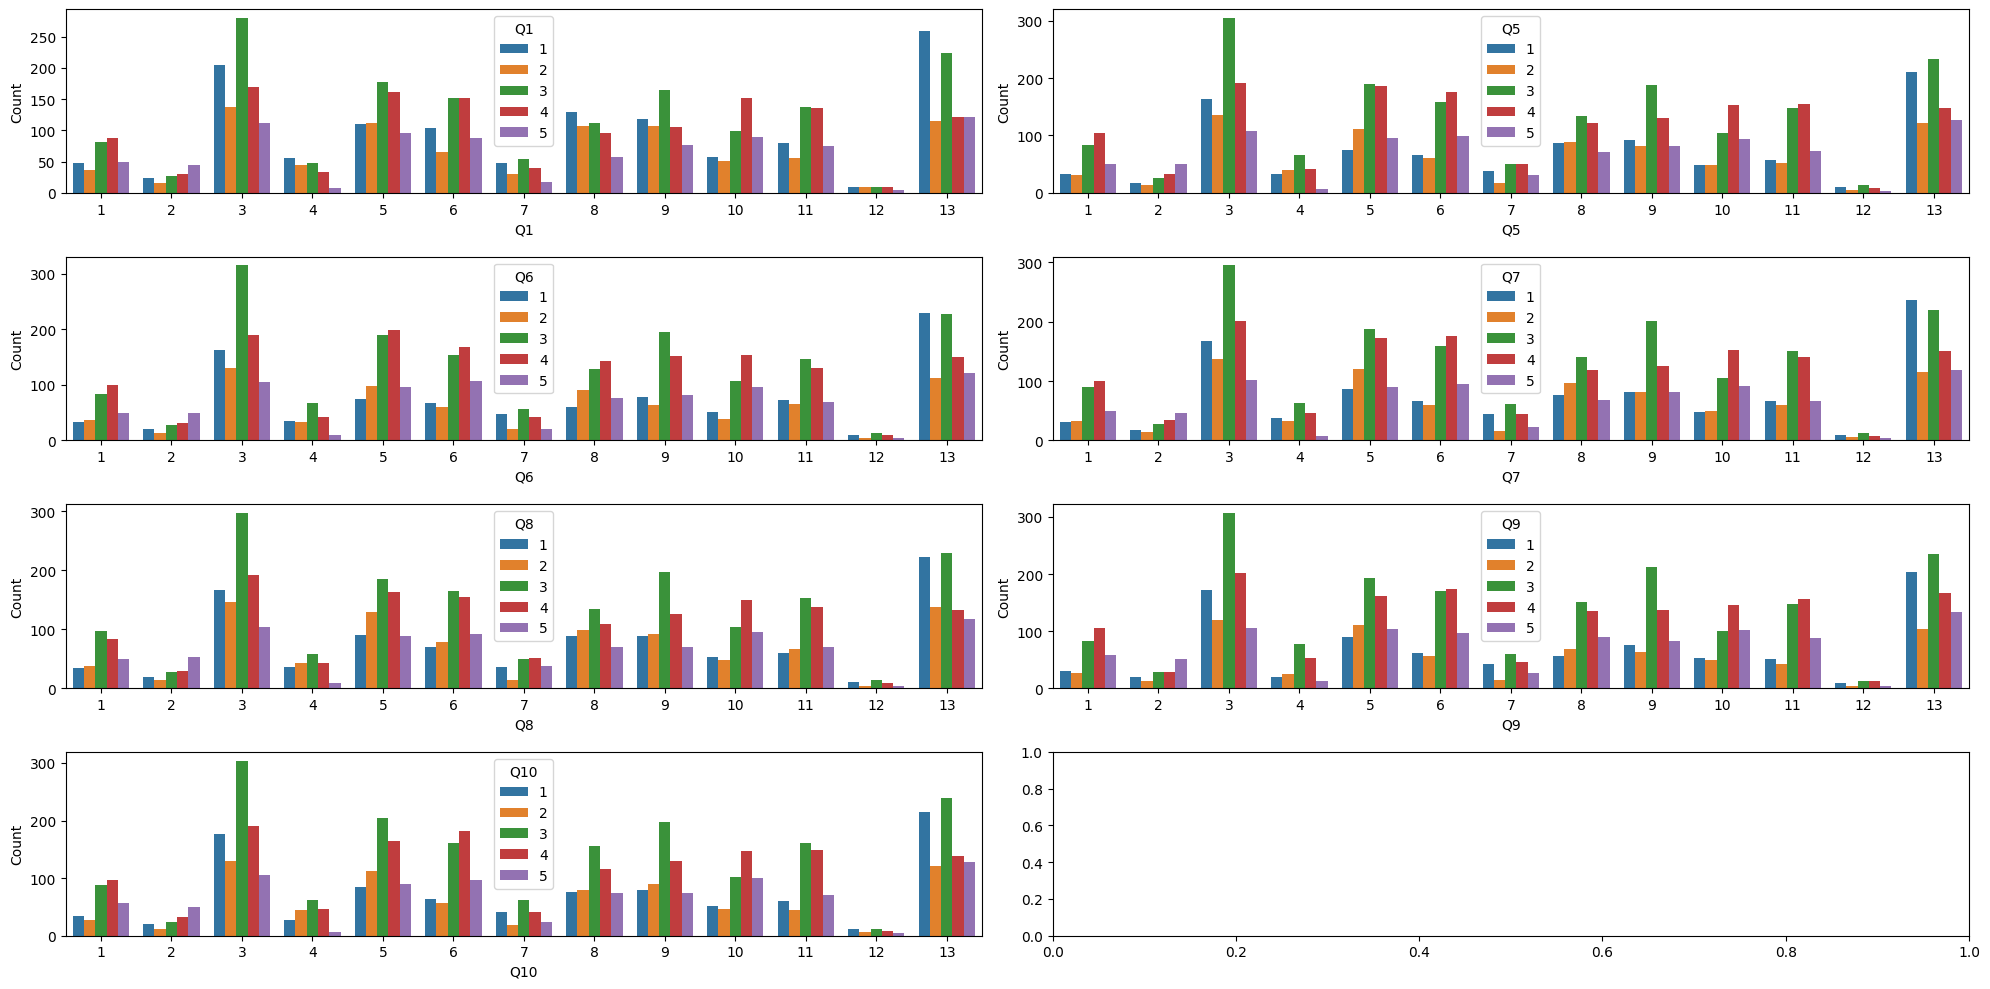

In [20]:
cat_cols = ['Q1','Q5','Q6','Q7','Q8','Q9','Q10']
hue_col = 'class'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
data.groupby(['instr'])[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']].mean()

,Q1,Q5,Q6,Q7,Q8,Q9,Q10
instr,,,,,,,
1,3.219355,3.384516,3.316129,3.323871,3.406452,3.353548,3.338065
2,3.119806,3.308864,3.247922,3.250693,3.208449,3.375346,3.305402
3,2.791447,2.964454,3.006109,2.936962,2.896695,3.041655,2.951402


As you can see from the plot below, Majority of the recorded scores of
Q1:  The semester course content, teaching method and evaluation system were provided at the start.

Q5:	The class discussions, homework assignments, applications and studies were satisfactory.

Q6:  The textbook and other courses resources were sufficient and up to date.

Q7:  The course allowed field work, applications, laboratory, discussion and other studies.

Q8:  The quizzes, assignments, projects and exams contributed to helping the learning.

Q9:  I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

are between the scores of 3 and 4, a high majority been 3

Instructor 3 has a majority between 1,3 and 4, why does Instructor 3 have a high majority of 1?

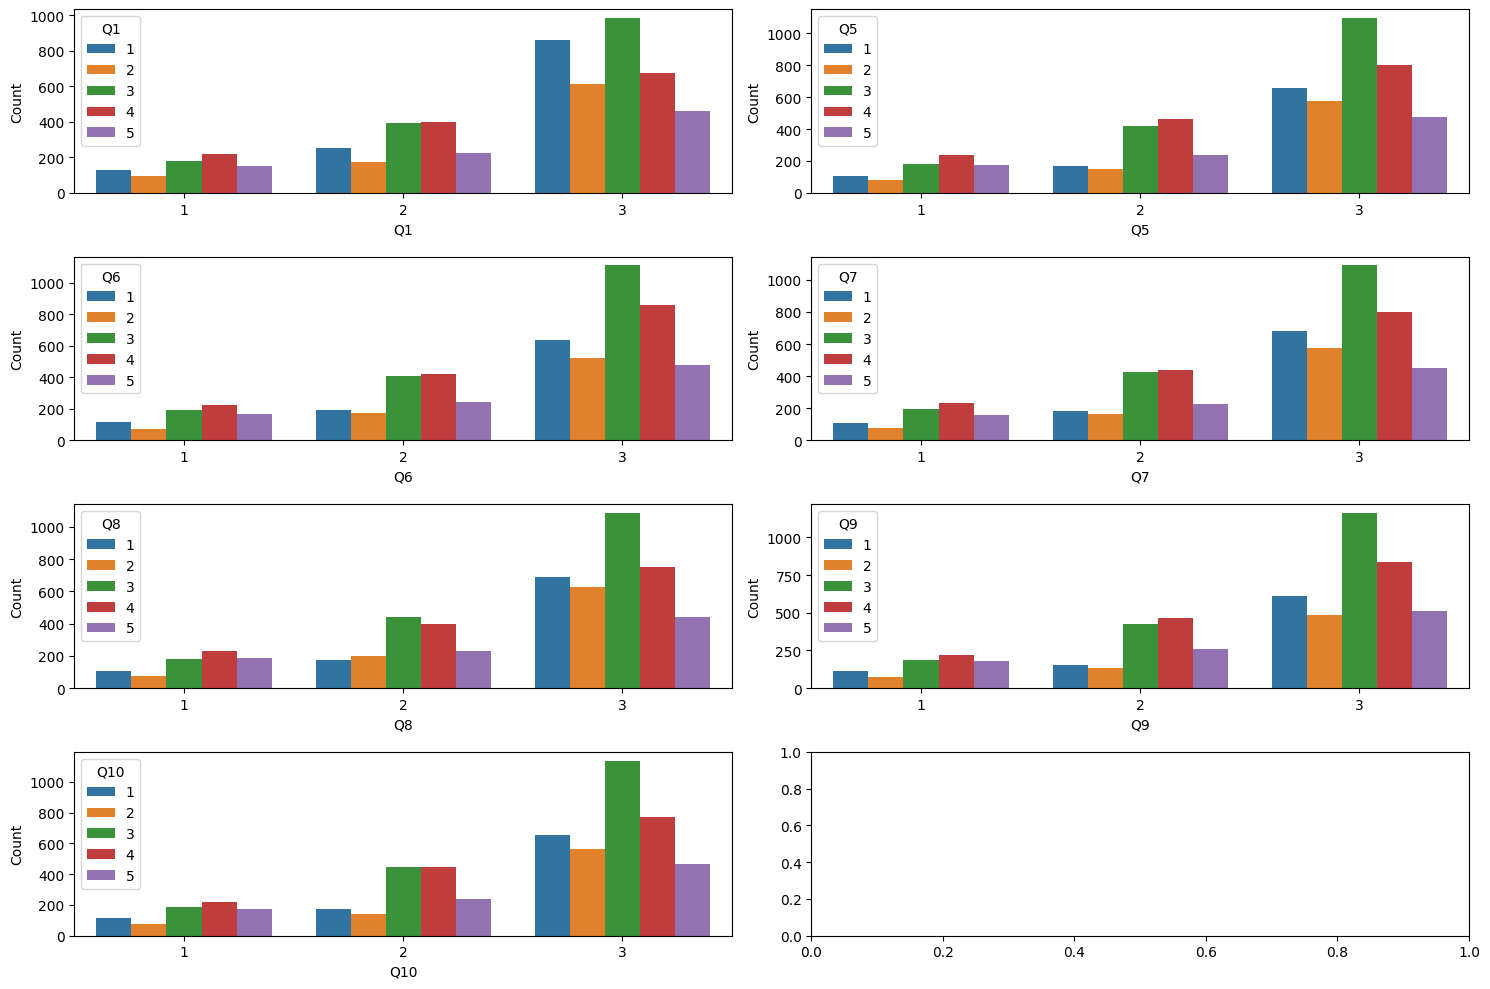

In [22]:
cat_cols = ['Q1','Q5','Q6','Q7','Q8','Q9','Q10']
hue_col = 'instr'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [23]:
data.groupby(['difficulty'])[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']].mean()

,Q1,Q5,Q6,Q7,Q8,Q9,Q10
difficulty,,,,,,,
1,2.724691,2.829012,2.850000,2.824691,2.813580,2.889506,2.832716
2,2.894353,3.143898,3.136612,3.087432,3.043716,3.253188,3.183971
3,3.131905,3.358512,3.373732,3.313980,3.266065,3.434047,3.360767
4,3.030204,3.261224,3.225306,3.188571,3.173061,3.287347,3.197551
5,2.731595,2.782209,2.776074,2.745399,2.751534,2.822086,2.717791


Q1: The semester course content, teaching method and evaluation system were provided at the start.

Q5: The class discussions, homework assignments, applications and studies were satisfactory.

Q6: The textbook and other courses resources were sufficient and up to date.

Q7: The course allowed field work, applications, laboratory, discussion and other studies.

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

As you can see from the plot below, Majority of the recorded scores of are between 3 and 4, but there are some few exceptions, for the difficulty of 1, majority of the recorded scores are between 1 and 3, A possible explanation will be that because of how easy the course is, not much atttention is given to field work, textbook, courses resources, this also leads to people not enjoying the class or being eager to learn, though there are some few exceptions with people giving a score of 3, clearly easier courses don't get the best score. For the difficulty of 5, majority of the recorded scores are between 1 and 3 too, Why is that?

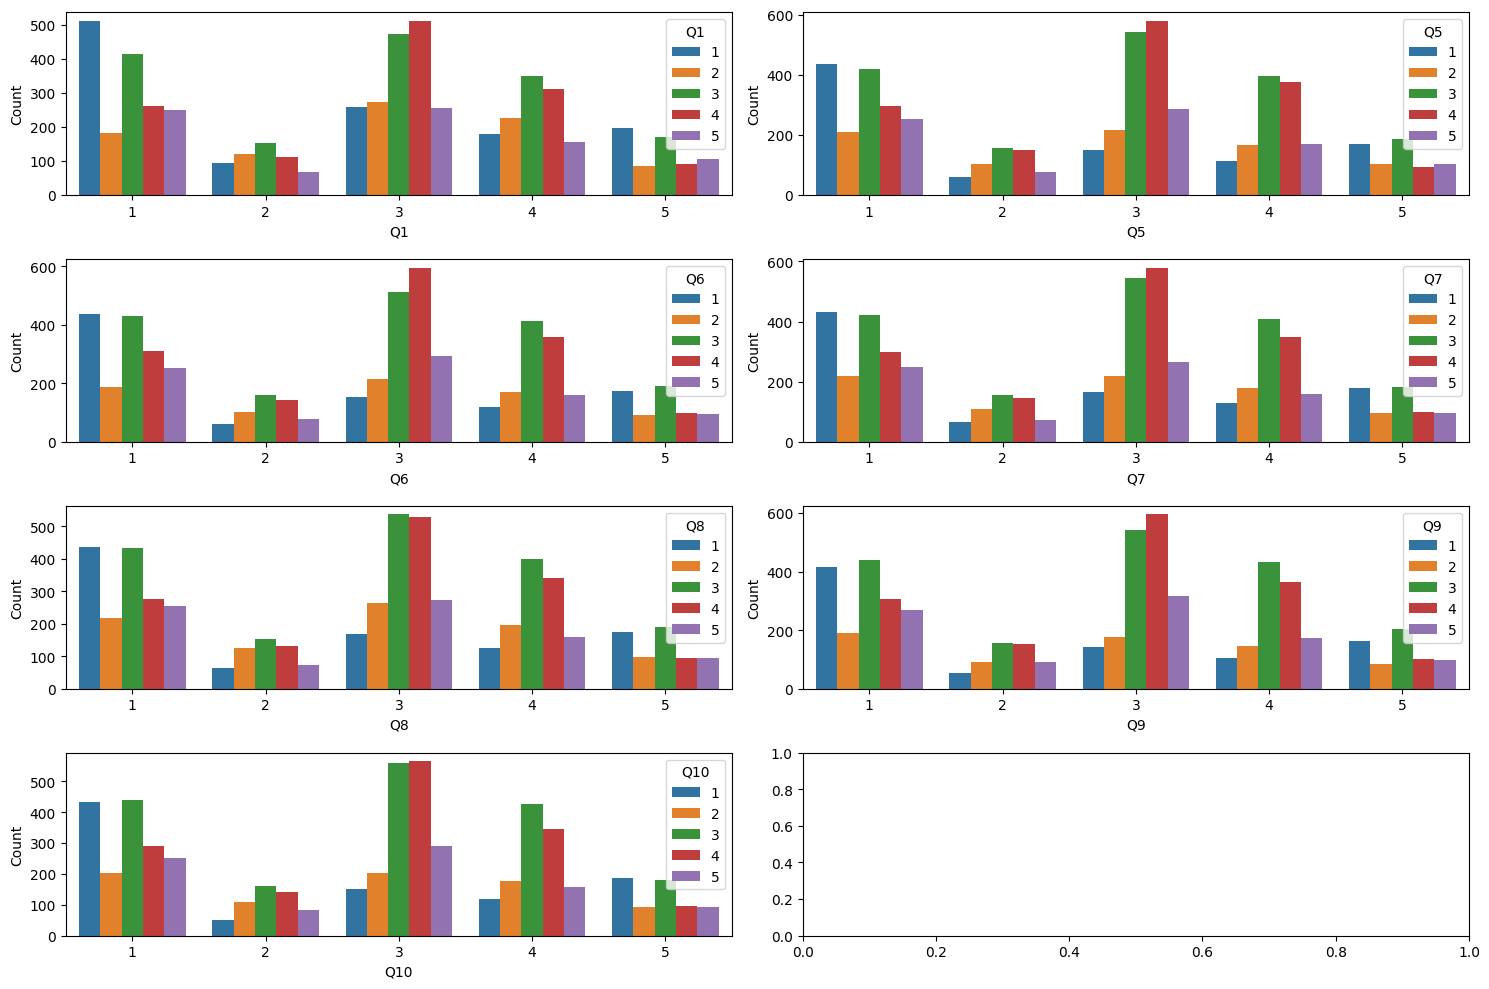

In [24]:
cat_cols = ['Q1','Q5','Q6','Q7','Q8','Q9','Q10']
hue_col = 'difficulty'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [25]:
data.groupby(['attendance'])[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']].mean()

,Q1,Q5,Q6,Q7,Q8,Q9,Q10
attendance,,,,,,,
0,2.768139,2.875920,2.885910,2.868034,2.846477,2.928496,2.883281
1,2.858949,2.998054,3.000973,2.955253,2.944553,2.994163,2.971790
2,2.964646,3.209596,3.212121,3.141414,3.099747,3.196970,3.145202
3,3.075879,3.324281,3.321086,3.244409,3.227636,3.407348,3.290735
4,3.131206,3.333333,3.320331,3.313239,3.270686,3.522459,3.354610


Q1: The semester course content, teaching method and evaluation system were provided at the start.

Q5: The class discussions, homework assignments, applications and studies were satisfactory.

Q6: The textbook and other courses resources were sufficient and up to date.

Q7: The course allowed field work, applications, laboratory, discussion and other studies.

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

As you can see from the plot below, Majority of the recorded scores are between 3 and 4, but there are some few exceptions

Attendance 0 has a majority of scores between 1 and 3, don't think we can expect much from people who hardly attended class

Attendance 1 has a majority of scores betweeen 1, 2 and 3

as Attendance goes up the Majority of Scores also seem to go up,

Attendance 4 has a majority of scores between 3, 4 and 5

The more the attendance, it seems the better the recorded scores for Class discussions, Textbooks,  quizzes, and eagerness to participate during Lectures

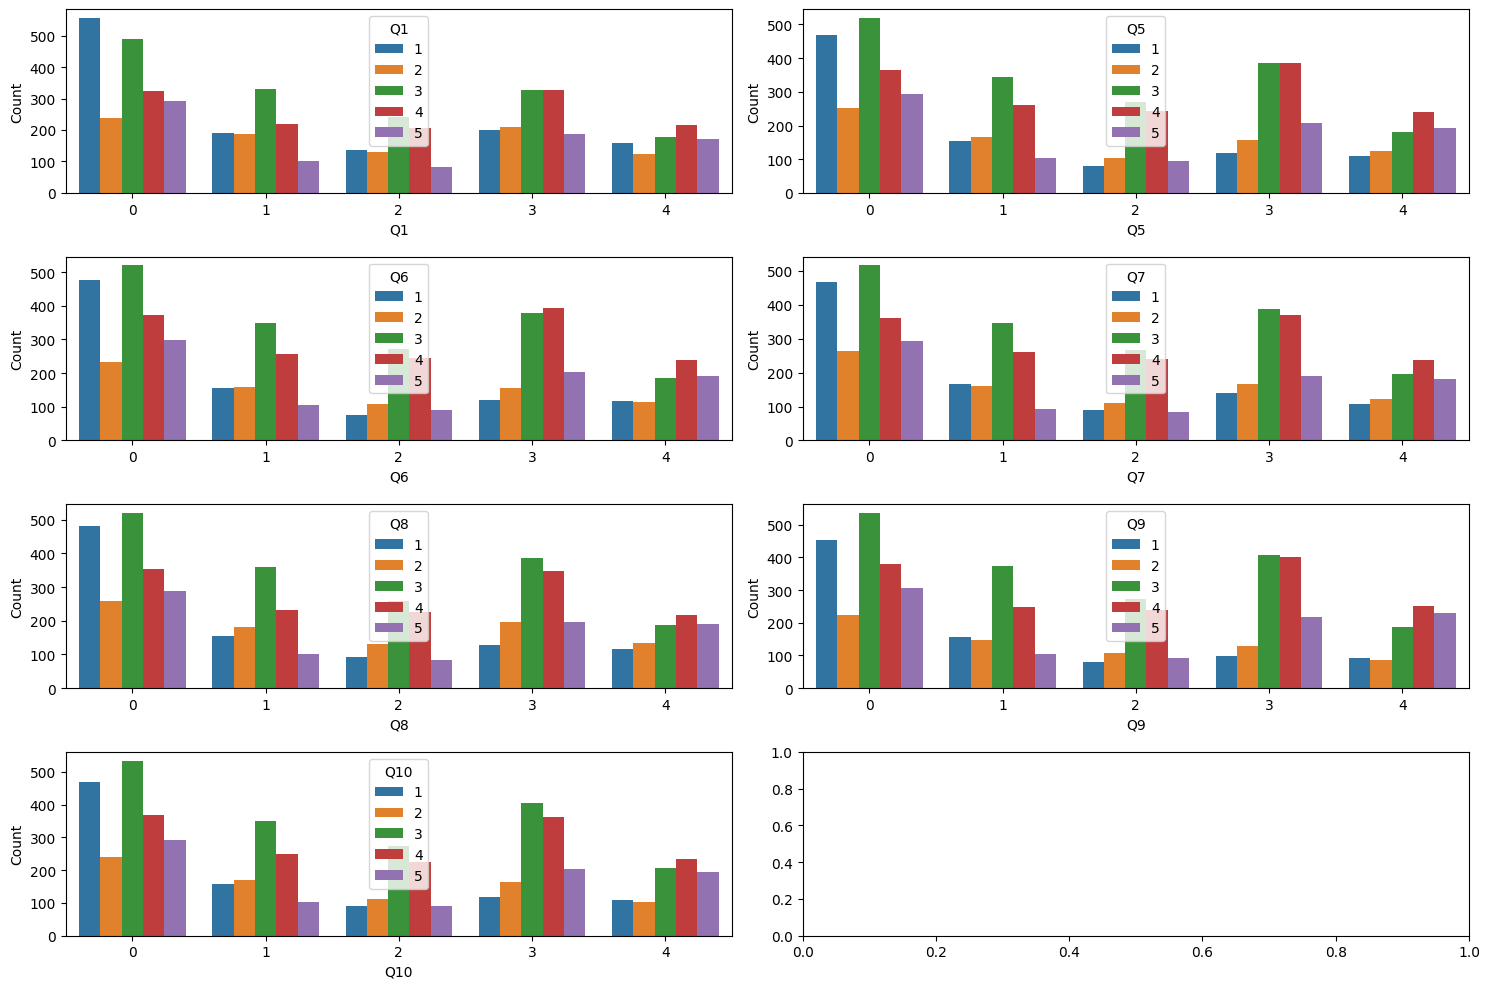

In [26]:
cat_cols = ['Q1','Q5','Q6','Q7','Q8','Q9','Q10']
hue_col = 'attendance'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
data.groupby(['nb.repeat'])[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']].mean()

,Q1,Q5,Q6,Q7,Q8,Q9,Q10
nb.repeat,,,,,,,
1,2.946832,3.125484,3.122428,3.085150,3.059075,3.189041,3.106335
2,2.819444,2.989583,3.036458,2.958333,2.916667,3.027778,3.020833
3,2.871642,3.017910,3.008955,2.976119,3.005970,3.065672,2.982090


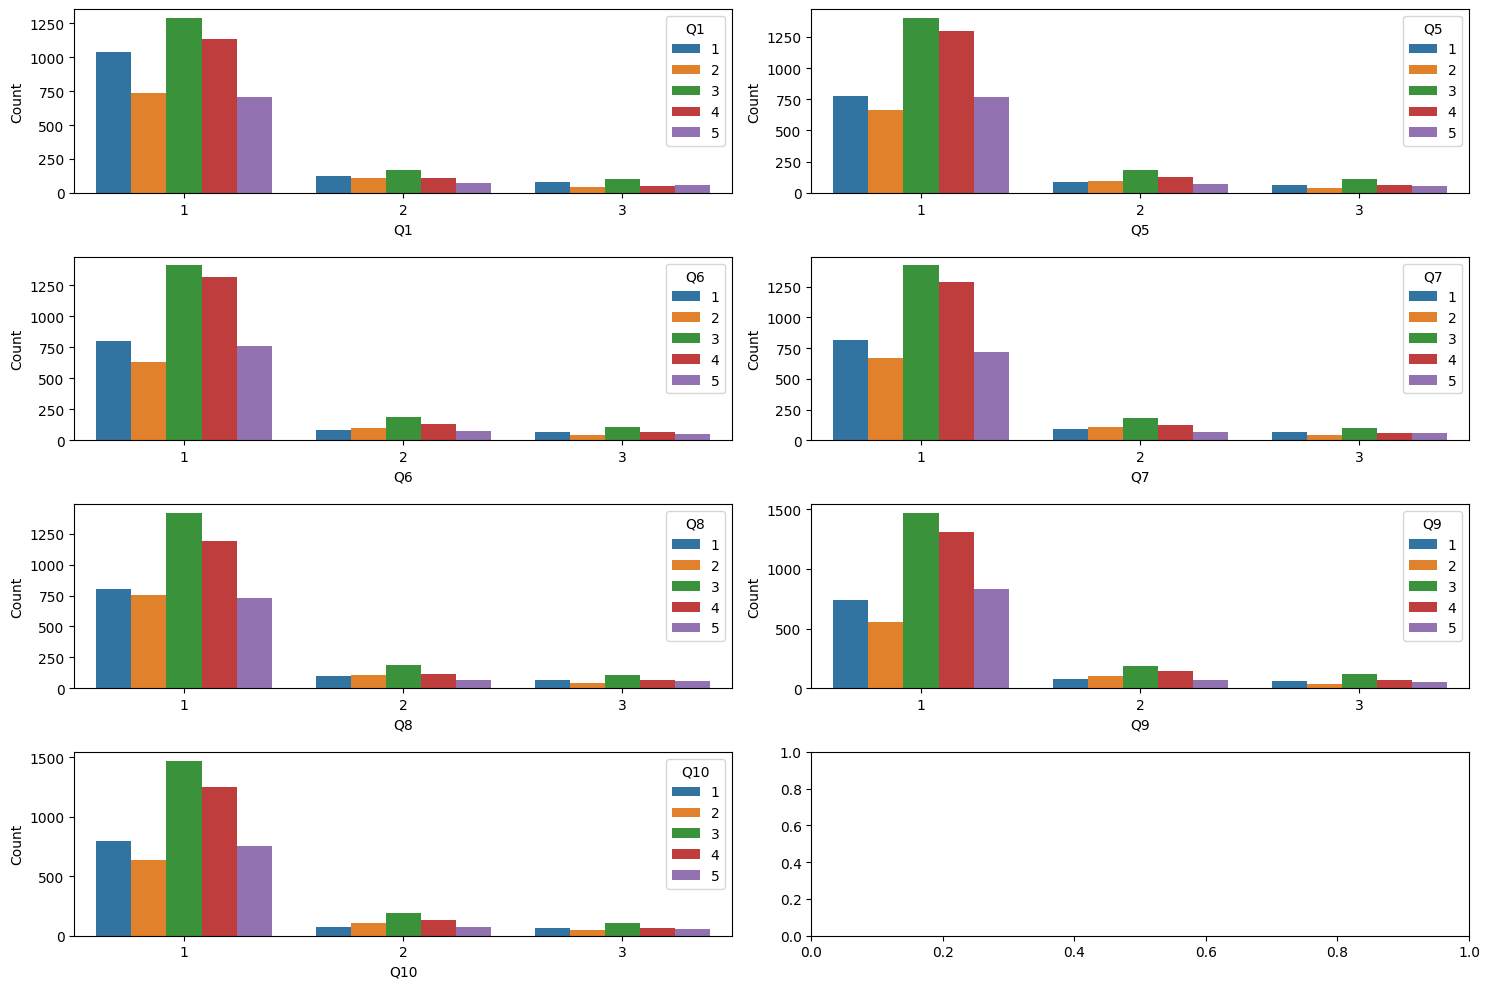

In [28]:
cat_cols = ['Q1','Q5','Q6','Q7','Q8','Q9','Q10']
hue_col = 'nb.repeat'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [29]:
def heatmap(df, length=10, width=5, cmap='rocket'):
  heatmap_df = df.corr()
  fig, ax = plt.subplots(figsize=(length, width))
  sns.heatmap(data=heatmap_df, annot=True, cmap=cmap, ax=ax)
  ax.set_title(f'Heatmap of {" and ".join(list(df.columns))}')
  plt.show()

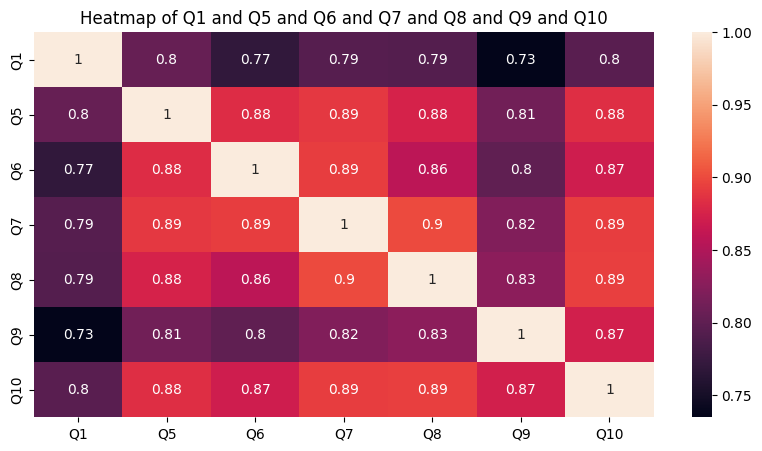

In [30]:
heatmap(data[['Q1','Q5','Q6','Q7','Q8','Q9','Q10']])

Q5(0.88), Q6(0.89), Q7(0.9), Q8(0.9), Q10(0.89) are closely correlated

##Summary

Some Conclusive Insights we can get from the above EDA are

- The higher the level of Attendance, the higher the recorded scores are for the semester course content, the class discussions , courses resources, allowed field work, quizzes, eagerness to actively participate during the lectures.

- Courses with Mid level Difficulty, between 3 and 4, have higher recorded scores for the semester course content, the class discussions , courses resources, allowed field work, quizzes, eagerness to actively participate during the lectures.

- Classes 1,2,10,11 which have a majority level difficulty of 3, and also have the highest levels of attendance, seems to have higher recorded scores for the semester course content, the class discussions , courses resources, allowed field work, quizzes, eagerness to actively participate during the lectures.

- Instructors 1, 2, which handle such classes with a mid level difficulty and a higher level of attendence also have higher recorded scores for the semester course content, the class discussions , courses resources, allowed field work, quizzes, eagerness to actively participate during the lectures.

- Finally Features which don't follow this logic, tends to have lower recorded scores for the semester course content, the class discussions , courses resources, allowed field work, quizzes, eagerness to actively participate during the lectures. This does not directly indicate causality, or a direct relationship.

- Q5, Q6,Q7, Q8, Q10 are closely correlated
- The fact that these features are closely correlated suggests that students are more likely to be satisfied with a course if they have a positive learning experience. This is because students are more likely to be able to learn the material effectively and to feel that they are making progress if they have access to the resources that they need, if they have the opportunity to apply the material, and if they feel that the assessments are fair.

- In addition, students are more likely to be satisfied with a course if their initial expectations are met. This is because students are more likely to be invested in the course and to be motivated to learn if they believe that the course will be worthwhile.

- Overall, the correlation between Q5, Q6, Q7, Q8, and Q10 suggests that students are more likely to be satisfied with a course if they have a positive learning experience and if their initial expectations are met.




##Q2-Q4,Q11,Q12 Course questions

In [31]:
data.groupby(['class'])[['Q2','Q3','Q4','Q11','Q12']].mean()

,Q2,Q3,Q4,Q11,Q12
class,,,,,
1,3.363036,3.399340,3.330033,3.498350,3.389439
2,3.492857,3.485714,3.457143,3.585714,3.521429
3,2.911504,2.994469,2.933628,2.910398,2.893805
4,2.631016,2.887701,2.631016,2.941176,2.737968
5,3.146341,3.120427,3.179878,3.048780,2.986280
6,3.290323,3.399642,3.275986,3.390681,3.284946
7,2.903743,3.117647,2.898396,3.245989,2.877005
8,3.020000,3.330000,3.018000,3.472000,2.974000
9,3.017513,3.217163,3.066550,3.302977,3.052539


Q2:  The course aims and objectives were clearly stated at the beginning of the period.

Q3:  The course was worth the amount of credit assigned to it.

Q4:  The course was taught according to the syllabus announced on the first day of class.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.


From the plot and the table, we can easily notice and see that Classes 1,2,10 and 11 have the highest recorded scores(3,4,5) for the selected questions, which are then followed closely behind by Classes 6, 11(3, 4). The first set of classes which are handled by Instructor 1, and the second set of classes are handled by Instructor 2, it seems Instructor 3 which handles the last set of classes, records the lowest recorded scores(1,3, 4), for the selected questions. Is this behavior because of the Instructor? or because of the difficulty of the course? or the attendance level of the course?


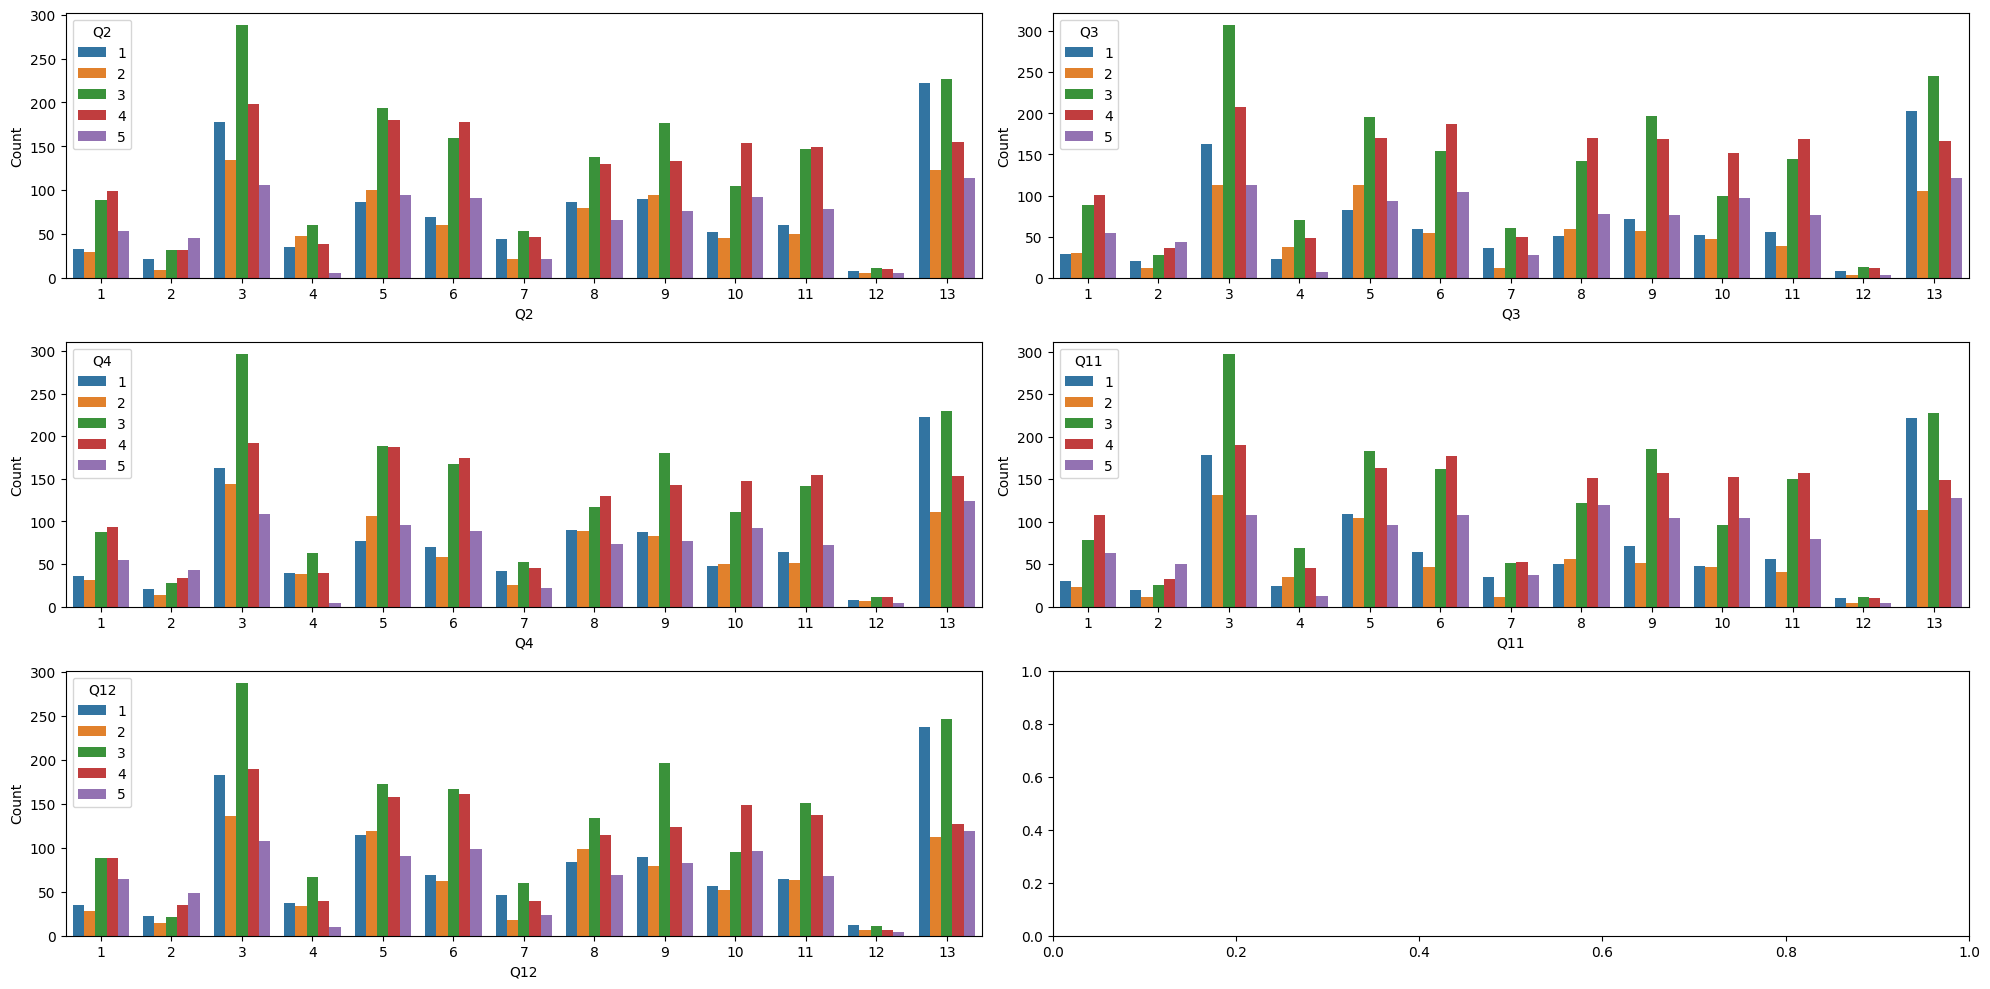

In [32]:
cat_cols = ['Q2','Q3','Q4','Q11','Q12']
hue_col = 'class'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [33]:
data.groupby(['instr'])[['Q2','Q3','Q4','Q11','Q12']].mean()

,Q2,Q3,Q4,Q11,Q12
instr,,,,,
1,3.309677,3.367742,3.296774,3.446452,3.289032
2,3.293629,3.371191,3.273546,3.387812,3.243767
3,2.935018,3.060816,2.959733,3.045543,2.897528



Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

From the plot and the table, we can easily notice and see that Instructors 1 and 2 have a majority of recorded scores between 3, 4 and 5, compared to Instructor 3 which has a majority of recorded scores between 1,3 and 4. Attention should be paid to why this is so, Instructor 3 which handles easier courses though with poor attendance, has lower scores for course aims and objectives.


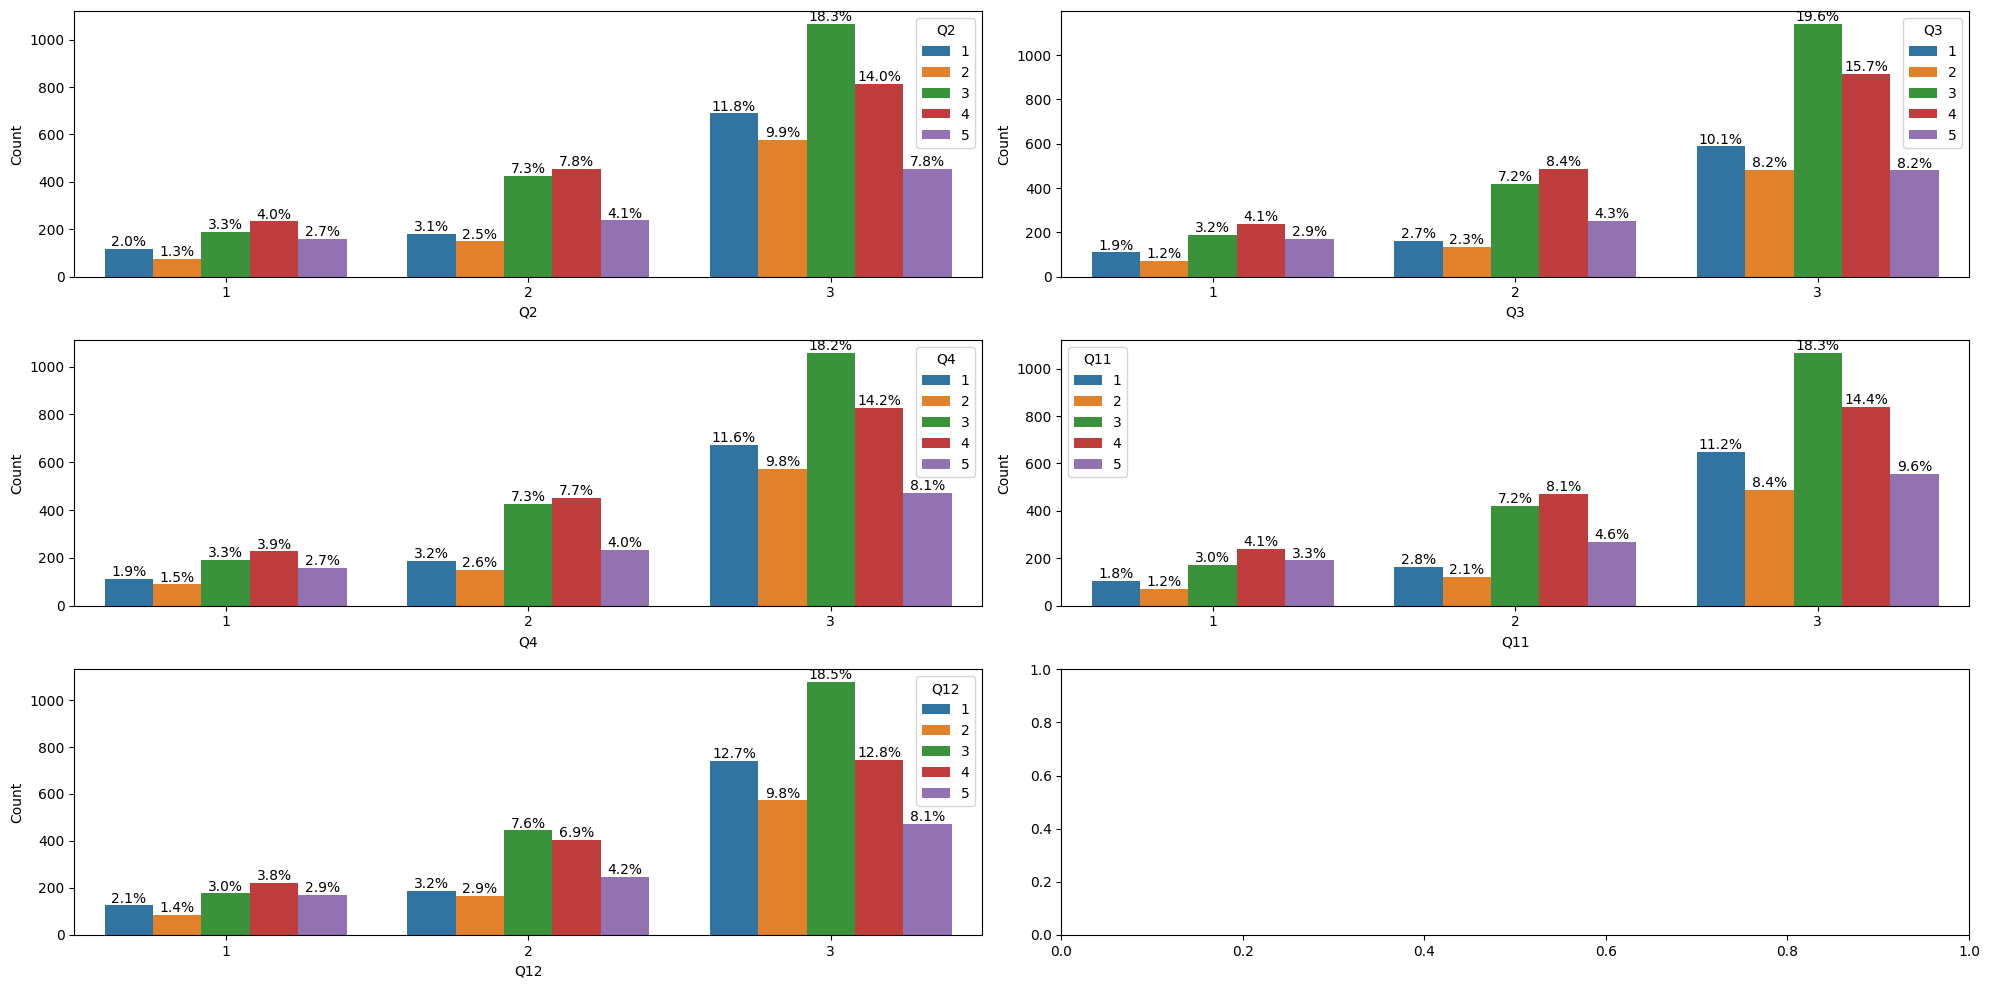

In [34]:
cat_cols = ['Q2','Q3','Q4','Q11','Q12']
hue_col = 'instr'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
  sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Count')

  for p in axs[i].patches:
    total = sum([p.get_height() for p in axs[i].patches])
    height = p.get_height()
    percentage = height / total * 100
    axs[i].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
data.groupby(['difficulty'])[['Q2','Q3','Q4','Q11','Q12']].mean()

,Q2,Q3,Q4,Q11,Q12
difficulty,,,,,
1,2.796914,2.862963,2.822222,2.882099,2.813580
2,3.092896,3.282332,3.111111,3.284153,3.091075
3,3.339910,3.456595,3.318489,3.481398,3.276212
4,3.207347,3.330612,3.225306,3.293878,3.133878
5,2.771472,2.834356,2.794479,2.832822,2.700920



Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

From the plot and the table, we can easily notice and see that  difficulty 0 and 5 have lesser recorded scores, a possible explanation could be that courses are too easy, students don't pay attention to it or benefit from it, and courses are too hard, students struggle to pay attention to it or benefit from it.

Courses with mid level of difficulty return the best benefits and get the most attention

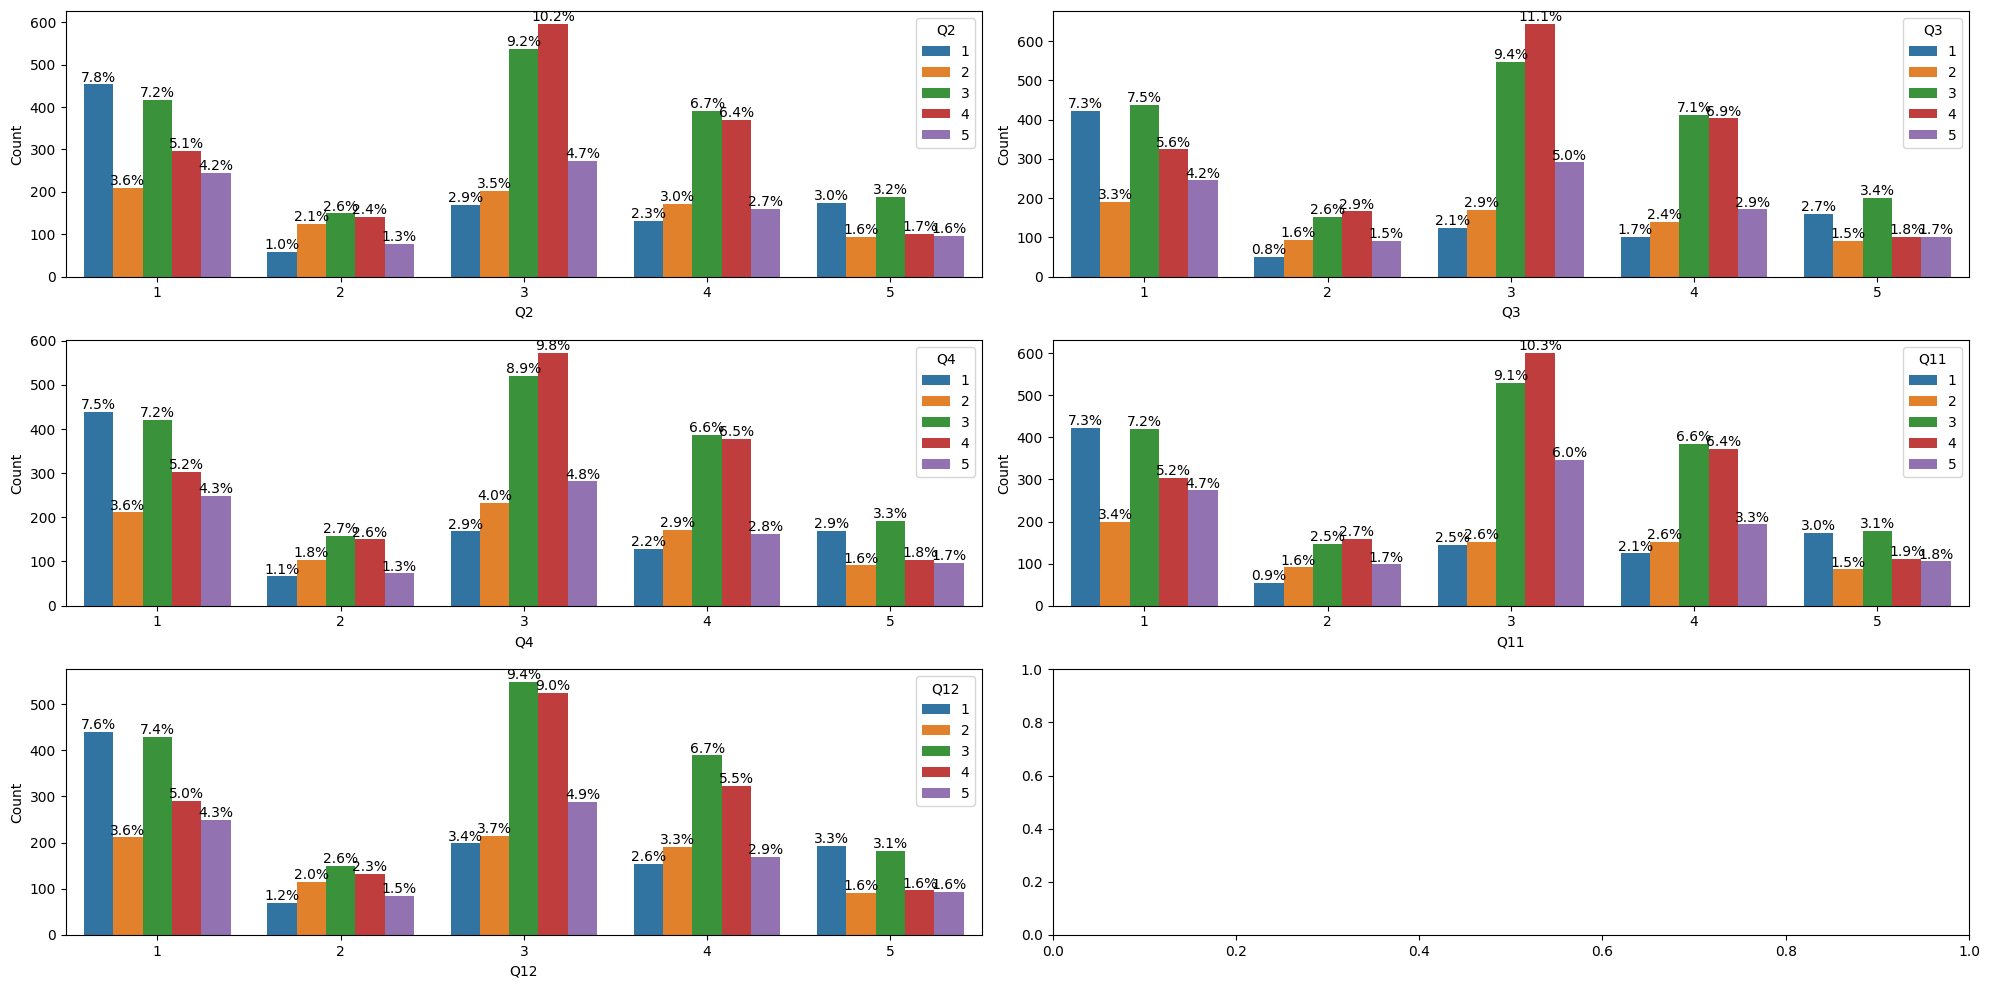

In [36]:
cat_cols = ['Q2','Q3','Q4','Q11','Q12']
hue_col = 'difficulty'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
  sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Count')

  for p in axs[i].patches:
    total = sum([p.get_height() for p in axs[i].patches])
    height = p.get_height()
    percentage = height / total * 100
    axs[i].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:
data.groupby(['attendance'])[['Q2','Q3','Q4','Q11','Q12']].mean()

,Q2,Q3,Q4,Q11,Q12
attendance,,,,,
0,2.858044,2.910095,2.871188,2.915878,2.850158
1,2.957198,3.073930,2.999027,3.069066,2.922179
2,3.136364,3.273990,3.155303,3.242424,3.085859
3,3.278754,3.415335,3.263578,3.432109,3.218051
4,3.339243,3.470449,3.322695,3.503546,3.273050


Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

From the plot and the table, we can easily notice and see that the recorded scores increase with the increase in the level of attendance, the higher the attendance the higher the recorded scores

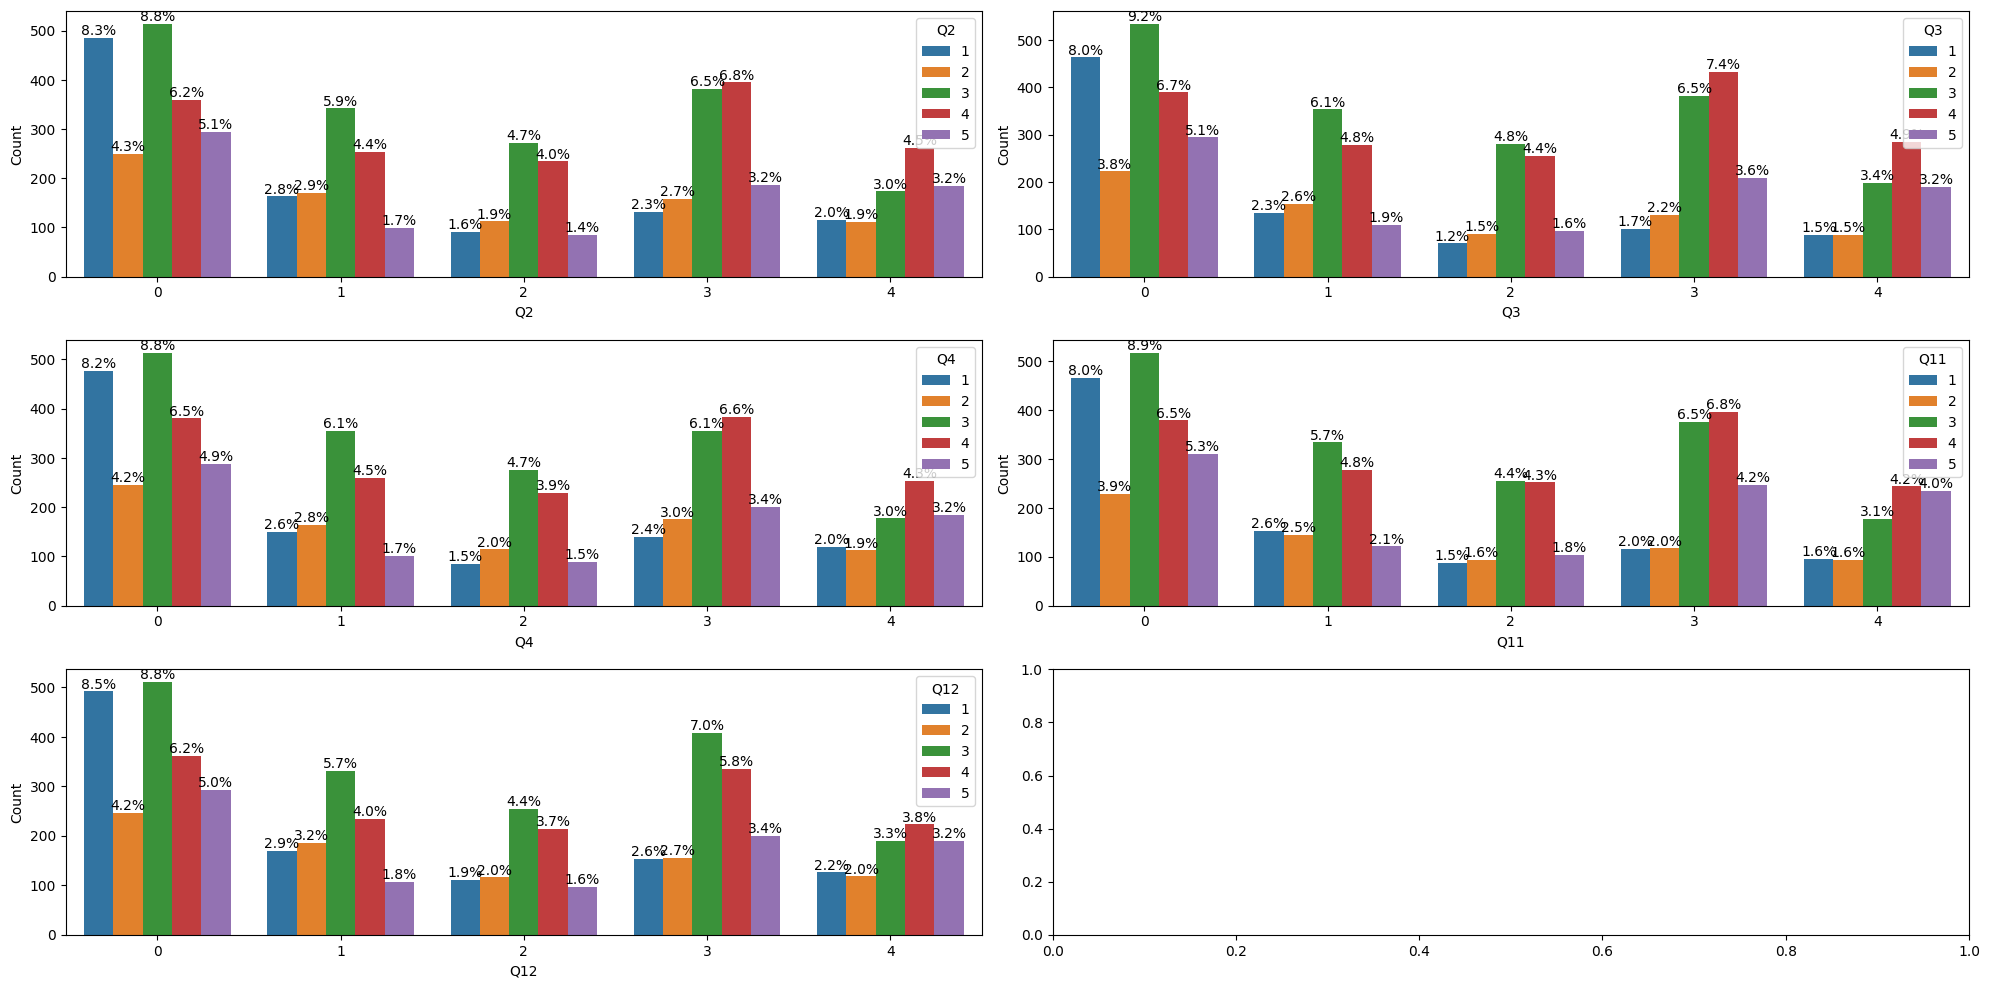

In [38]:
cat_cols = ['Q2','Q3','Q4','Q11','Q12']
hue_col = 'attendance'
fig, axs = plt.subplots(len(cat_cols)//2+1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
  sns.countplot(data=data, x=hue_col, hue=col, ax=axs[i])
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Count')

  for p in axs[i].patches:
    total = sum([p.get_height() for p in axs[i].patches])
    height = p.get_height()
    percentage = height / total * 100
    axs[i].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

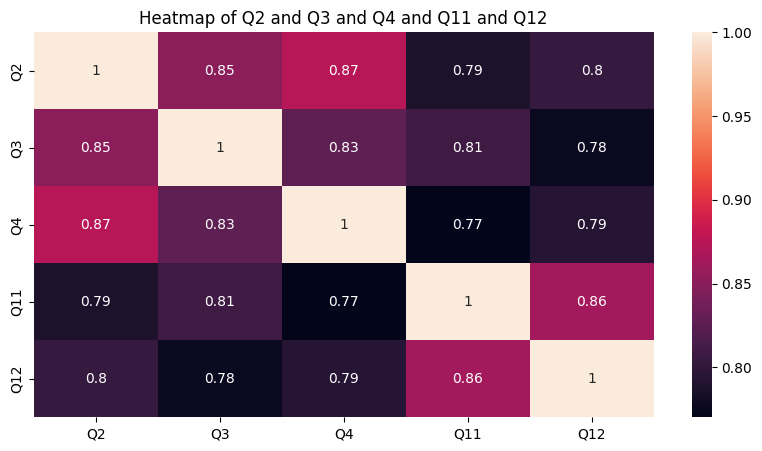

In [39]:
heatmap(data[['Q2','Q3','Q4','Q11','Q12']])

Q2, Q4 are closely related



Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q4: The course was taught according to the syllabus announced on the first day of class.

##SUMMARY

Some Conclusive Insights we can get from the above EDA are

- The higher the level of Attendance, the higher the recorded scores are for the course aims and objectives, the worth of the amount of credit assigned to the course, course syllabus, relevance and benefits to professional development, and developing a new perspective.

- Courses with Mid level Difficulty, between 3 and 4, have higher recorded scores are for the course aims and objectives, the worth of the amount of credit assigned to the course, course syllabus, relevance and benefits to professional development, and developing a new perspective.

- Classes 1,2,10,11 which have a majority level difficulty of 3, and also have the highest levels of attendance, seems to have recorded scores are for the course aims and objectives, the worth of the amount of credit assigned to the course, course syllabus, relevance and benefits to professional development, and developing a new perspective.

- Instructors 1, 2, which handle such classes with a mid level difficulty and a higher level of attendence also have higher recorded scores are for the course aims and objectives, the worth of the amount of credit assigned to the course, course syllabus, relevance and benefits to professional development, and developing a new perspective.

- Finally Features which don't follow this logic, tends to have lower recorded scores are for the course aims and objectives, the worth of the amount of credit assigned to the course, course syllabus, relevance and benefits to professional development, and developing a new perspective.

- Q2, Q4 are closely related

- The fact that these two features are closely correlated suggests that students are more likely to be satisfied with a course if the instructor is clear and organized in their teaching. This is because students are more likely to be able to follow the course and to understand what they are learning if the instructor is clear about their expectations.

- In addition, students are more likely to be satisfied with a course if the instructor follows the syllabus. This is because students want to know what they are expected to learn in the course, and they want to be able to track their progress towards the learning objectives.

- Overall, the correlation between Q2 and Q4 suggests that students are more likely to be satisfied with a course if the instructor is clear and organized in their teaching, and if they follow the syllabus.



##Q13-Q28 Instructor questions

In [40]:
q_cols = ['Q13','Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23','Q24', 'Q25', 'Q26', 'Q27', 'Q28']

In [41]:
data.groupby(['class'])[q_cols].mean()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
class,,,,,,,,,,,,,,,,
1,3.508251,3.511551,3.501650,3.481848,3.574257,3.518152,3.524752,3.501650,3.541254,3.524752,3.481848,3.415842,3.501650,3.504950,3.369637,3.574257
2,3.671429,3.707143,3.678571,3.614286,3.714286,3.671429,3.650000,3.671429,3.642857,3.614286,3.600000,3.607143,3.642857,3.557143,3.585714,3.614286
3,3.056416,3.084071,3.079646,2.974558,3.147124,2.977876,3.024336,3.058628,3.066372,3.080752,3.002212,2.988938,3.115044,3.019912,2.973451,3.115044
4,3.106952,3.187166,3.096257,2.903743,3.411765,2.989305,3.000000,3.090909,3.122995,3.074866,2.919786,2.877005,3.160428,3.096257,2.919786,3.187166
5,3.295732,3.336890,3.349085,3.199695,3.414634,3.184451,3.248476,3.320122,3.304878,3.321646,3.182927,3.187500,3.315549,3.237805,3.138720,3.315549
6,3.508961,3.510753,3.498208,3.478495,3.537634,3.541219,3.494624,3.483871,3.483871,3.519713,3.431900,3.401434,3.482079,3.410394,3.336918,3.483871
7,3.106952,3.224599,3.192513,3.021390,3.342246,3.208556,3.165775,3.176471,3.090909,3.090909,3.122995,3.203209,3.213904,3.074866,2.973262,3.117647
8,3.294000,3.470000,3.466000,3.124000,3.762000,3.232000,3.440000,3.552000,3.690000,3.648000,3.282000,3.194000,3.588000,3.320000,3.240000,3.572000
9,3.171629,3.264448,3.283713,3.087566,3.436077,3.122592,3.215412,3.292469,3.309982,3.330998,3.169877,3.101576,3.311734,3.189142,3.162872,3.308231


In [42]:
data.groupby(['instr'])[q_cols].mean()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,,,,,,,,,,,,,,,,
1,3.416774,3.456774,3.438710,3.369032,3.513548,3.449032,3.421935,3.393548,3.367742,3.387097,3.383226,3.403871,3.427097,3.370323,3.331613,3.405161
2,3.463989,3.484765,3.486842,3.429363,3.570637,3.529778,3.502770,3.490305,3.529778,3.538781,3.445291,3.388504,3.493767,3.443906,3.367729,3.506233
3,3.116634,3.177451,3.174674,3.022494,3.304638,3.050542,3.130519,3.179950,3.205221,3.213829,3.065260,3.026937,3.215218,3.101361,3.031380,3.207720


In [43]:
data.groupby(['difficulty'])[q_cols].mean()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
difficulty,,,,,,,,,,,,,,,,
1,2.908025,2.941358,2.938889,2.890123,2.977160,2.909259,2.923457,2.946296,2.952469,2.945679,2.885185,2.872222,2.951852,2.917901,2.880247,2.951235
2,3.340619,3.377049,3.402550,3.293260,3.491803,3.316940,3.353370,3.342441,3.398907,3.411658,3.273224,3.202186,3.371585,3.300546,3.216758,3.395264
3,3.532131,3.571026,3.558625,3.452649,3.706877,3.509019,3.559752,3.558061,3.584555,3.612740,3.479143,3.427283,3.602593,3.507328,3.409245,3.600338
4,3.400000,3.468571,3.471020,3.251429,3.613061,3.360816,3.413878,3.467755,3.480816,3.493878,3.364082,3.329796,3.497959,3.375510,3.295510,3.487347
5,2.909509,2.990798,2.972393,2.835890,3.124233,2.881902,2.927914,2.995399,3.032209,3.027607,2.869632,2.854294,3.021472,2.848160,2.828221,2.989264


In [44]:
data.groupby(['attendance'])[q_cols].mean()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
attendance,,,,,,,,,,,,,,,,
0,2.958991,2.991588,2.993691,2.942692,3.040484,2.946898,2.964774,2.990011,3.001577,3.004206,2.936383,2.917455,3.003680,2.960042,2.925342,2.991588
1,3.114786,3.148833,3.156615,3.046693,3.253891,3.110895,3.157588,3.155642,3.181907,3.187743,3.084630,3.071012,3.190661,3.118677,3.083658,3.197471
2,3.361111,3.406566,3.406566,3.257576,3.539141,3.319444,3.357323,3.387626,3.381313,3.412879,3.282828,3.241162,3.393939,3.305556,3.228535,3.435606
3,3.516773,3.572684,3.559904,3.388179,3.740415,3.477636,3.543131,3.562300,3.598243,3.614217,3.450479,3.393770,3.624601,3.460064,3.349840,3.587859
4,3.520095,3.611111,3.591017,3.423168,3.741135,3.509456,3.549645,3.601655,3.647754,3.651300,3.497636,3.438534,3.617021,3.507092,3.399527,3.620567


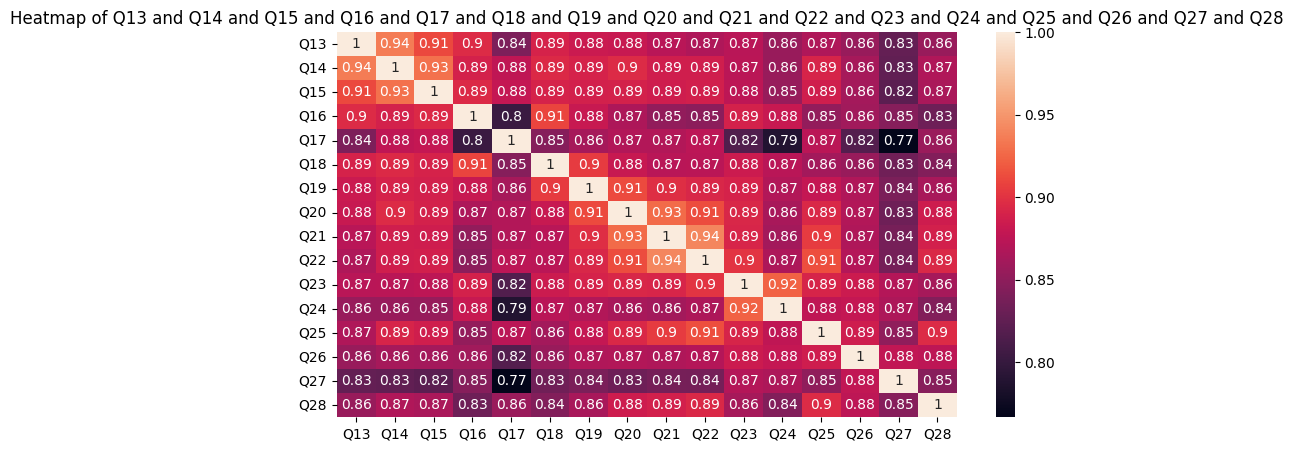

In [45]:
heatmap(data[q_cols])

Q13, Q14(0.94), Q15(0.91), Q16(0.9), Q18(0.89), Q19(0.88), Q20(0.88) are closely correlated

Q14, Q15(0.93), Q19(0.89), Q20(0.9), Q21(0.89), Q22(0.9), Q23(0.9), Q25(0.9) are closely related

Q16, Q23(0.89), Q24(0.92), Q25(0.89) are closely related

Q25, Q26(0.89), Q28(0.9)

Q21, Q22(0.89), Q28(0.89)


##SUMMARY

- The same trend follows

- Q13, Q14, Q15, Q16, Q18, Q19, and Q20 are all related to the instructor's knowledge, preparation, delivery, and use of class hours. This suggests that students are more likely to be satisfied with an instructor who is knowledgeable about the subject matter and who comes prepared to class.

- Q14, Q15, Q19, Q20, Q21, Q22, Q23, and Q25 are all related to the instructor's positive approach, respectfulness, encouragement, and responsiveness to the students. This suggests that students are more likely to be satisfied with an instructor who has clear and effective communication skills.

- Q16, Q23, Q24, and Q25 are all related to the instructor's commitment, participation, homework assignments, and guidance. This suggests that students are more likely to be satisfied with an instructor who is committed to the course and who creates a positive learning environment.

- Q25, Q26, and Q28 are all related to the instructor's evaluation system, solutions, and fairness.  This suggests that students are more likely to be satisfied with an instructor who uses an evaluation system that is fair and objective.

- Q21, Q22, and Q28 are all related to the instructor's openness, respectfulness, and fairness. This suggests that these aspects of teaching are important for the students' trust and confidence in the instructor.

##CONCLUSION

In [46]:
p_cols = ['Q5','Q6','Q7','Q8','Q10']
c_cols = ['Q2','Q4']
q_cols = ['Q14', 'Q15','Q19', 'Q20', 'Q21', 'Q22', 'Q23','Q25']
cat_cols = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']
data_cols = p_cols + c_cols + q_cols + cat_cols

In [47]:
pdx = data[(data['Q5']==1) | (data['Q6']==1) | (data['Q7']==1) | (data['Q8']==1) | (data['Q10']==1)][data_cols]

In [48]:
ipdx = pdx[(pdx['instr']==1) | (pdx['instr']==2)]
cpdx = ipdx[(ipdx['class']==1) | (ipdx['class']==2) | (ipdx['class']==10) | (ipdx['class']==11)]
dpdx = cpdx[(cpdx['difficulty']==3) | (cpdx['difficulty']==4)]
apdx_p = dpdx[(dpdx['attendance']==4) | (dpdx['attendance']==4)]

In [49]:
apdx_p

,Q5,Q6,Q7,Q8,Q10,Q2,Q4,Q14,Q15,Q19,Q20,Q21,Q22,Q23,Q25,instr,class,nb.repeat,attendance,difficulty
57,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,4,4
339,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,3
650,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,3
681,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,4
688,2,1,2,1,2,1,2,1,2,1,2,1,1,2,2,1,10,1,4,3
1681,2,1,1,2,3,3,3,4,4,4,4,4,4,4,4,2,11,1,4,3
1722,1,1,1,1,1,1,1,1,3,1,1,3,3,3,3,2,11,1,4,3
1843,1,1,1,1,1,1,1,2,1,3,1,1,1,1,1,2,11,2,4,3
1866,4,2,4,1,4,2,4,5,5,5,5,5,5,4,5,2,11,1,4,3
1903,2,1,2,2,3,2,1,4,3,3,4,4,3,3,4,2,11,1,4,4


Some certain students are not satisfied with the course and their learning experience and their initial expectations are not met, this students are likely not making progress, maybe they do not have access to the resources that they need, or they don't have the opportunity to apply the material, and they don't feel that the assessments are fair. 4 of such students are satisfied with the teacher's clear and organized teaching and following the syllabus, they are also satisfied with the teacher's evaluation system, overrall approach and communication skills. Maybe this particular set of students have poor backgrounds, or perhaps a troublesome background, more investigation will need to be held

In [50]:
qdx = data[(data['Q14']==1) | (data['Q15']==1) | (data['Q19']==1) | (data['Q20']==1) | (data['Q21']==1) | (data['Q22']==1) | (data['Q23']==1) | (data['Q25']==1)][data_cols]
ipdx = qdx[(qdx['instr']==1) | (qdx['instr']==2)]
cpdx = ipdx[(ipdx['class']==1) | (ipdx['class']==2) | (ipdx['class']==10) | (ipdx['class']==11)]
dpdx = cpdx[(cpdx['difficulty']==3) | (cpdx['difficulty']==4)]
apdx_q = dpdx[(dpdx['attendance']==4) | (dpdx['attendance']==4)]

In [51]:
apdx_q

,Q5,Q6,Q7,Q8,Q10,Q2,Q4,Q14,Q15,Q19,Q20,Q21,Q22,Q23,Q25,instr,class,nb.repeat,attendance,difficulty
57,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,4,4
339,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,3
343,5,5,4,3,4,5,5,4,4,5,5,5,5,5,1,1,10,1,4,4
473,5,5,5,5,5,5,5,1,1,1,1,1,1,1,1,1,10,1,4,3
650,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,3
681,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,1,4,4
688,2,1,2,1,2,1,2,1,2,1,2,1,1,2,2,1,10,1,4,3
1648,4,3,2,2,4,2,3,5,4,1,3,5,5,3,5,2,11,1,4,4
1679,2,2,2,2,2,2,1,2,3,1,1,3,4,4,5,2,11,1,4,4
1722,1,1,1,1,1,1,1,1,3,1,1,3,3,3,3,2,11,1,4,3


On only 2 occassions there were students who were satisfied with the course and their learning experience and their initial expectations are met, this students are making progress, they have access to the resources that they need, they have the opportunity to apply the material, and they feel that the assessments are fair. 2 of such students are dissatisfied with the teacher's clear and organized teaching and following the syllabus, they are also dissatisfied with the teacher's evaluation system, overrall approach and communication skills. Maybe this particular set of students do not like the teacher or the course been taught.